In [1]:
import pandas as pd
import os

### Task 1: To Merge several files together

In [2]:
files= [file for file in os.listdir(r"C:\Users\hp\Downloads\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
all_csv= pd.DataFrame()
for file in files:
    df= pd.read_csv(r"C:\Users\hp\Downloads\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" + file)
#Order ID  Product    Quantity Ordered   Price Each    Order Date      Purchase Address
    
    df=df[(df['Order ID']!='Order ID') & (df['Product']!='Product')&(df['Quantity Ordered']!='Quantity Ordered')&
       (df['Price Each']!='Price Each') &(df['Order Date']!='Order Date')&(df['Purchase Address']!='Purchase Address')]    
    
    all_csv= pd.concat([all_csv, df])

all_csv.to_csv('all_data.csv', index=False)




In [3]:
data = {
 'Name':['Neha', 'Nidhi', 'Sita'],
 'Age': [26,25,15]   }
new = pd.DataFrame(data)
n1=new.set_index(pd.Index(['A','B','C']))
n1

,Name,Age
A,Neha,26
B,Nidhi,25
C,Sita,15


In [4]:
all_data= pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning the Date

In [5]:
all_data.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.drop_duplicates(inplace= True)

In [7]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data.dropna(how='all', inplace=True)

In [9]:
all_data.reset_index(drop =True, inplace= True)

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
all_data['Order ID']=all_data['Order ID'].astype(int)

### creating the month col

In [12]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_10352\1979206396.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']= pd.to_datetime(all_data['Order Date'])


In [13]:
all_data['Month']= all_data['Order Date'].dt.month
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
all_data.iloc[[517]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
517,177056,Flatscreen TV,1.0,300.0,2019-04-20 23:52:00,"180 9th St, San Francisco, CA 94016",4,300.0


In [15]:
all_data.value_counts()


Order ID  Product                     Quantity Ordered  Price Each  Order Date           Purchase Address                        Month  Sales 
141234    iPhone                      1.0               700.00      2019-01-22 21:25:00  944 Walnut St, Boston, MA 02215         1      700.00    1
260170    27in 4K Gaming Monitor      1.0               389.99      2019-10-08 12:31:00  275 Sunset St, Los Angeles, CA 90001    10     389.99    1
260172    Bose SoundSport Headphones  1.0               99.99       2019-10-16 21:03:00  636 Elm St, Boston, MA 02215            10     99.99     1
260173    20in Monitor                1.0               109.99      2019-10-26 11:38:00  350 Washington St, Boston, MA 02215     10     109.99    1
260174    USB-C Charging Cable        1.0               11.95       2019-10-16 09:22:00  889 Maple St, Austin, TX 73301          10     11.95     1
                                                                                                                     

### Q1: What was the best month for sales? How much was earned that month?

In [16]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
all_data.groupby('Month')[['Quantity Ordered','Price Each','Sales']].sum().sort_values('Sales', ascending= False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28074.0,4583267.77,4608295.70
10,22669.0,3713608.80,3734777.86
4,20536.0,3366218.76,3389217.98
11,19769.0,3178872.53,3197875.05
5,18653.0,3133134.61,3150616.23
3,16979.0,2789084.64,2804973.35
7,16054.0,2631225.12,2646461.32
6,15234.0,2560503.50,2576280.15
8,13429.0,2226963.90,2241083.37


In [18]:
result= all_data.groupby('Month')[['Quantity Ordered','Price Each','Sales']].sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893.0,1810924.81,1821413.16
2,13431.0,2186940.38,2200078.08
3,16979.0,2789084.64,2804973.35
4,20536.0,3366218.76,3389217.98
5,18653.0,3133134.61,3150616.23
6,15234.0,2560503.50,2576280.15
7,16054.0,2631225.12,2646461.32
8,13429.0,2226963.90,2241083.37
9,13091.0,2081897.65,2094465.69


<function matplotlib.pyplot.show(close=None, block=None)>

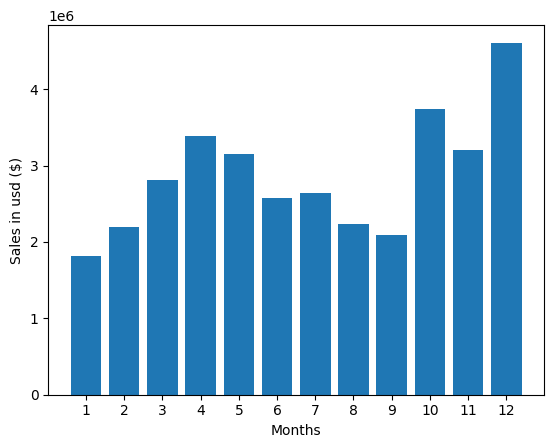

In [19]:
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in usd ($)')
plt.show

### Q2: What city sold the most product?

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
def citi(x):                          #When you use .apply(), pandas iterates over each element in that Series.
    return x.split(',')[1].strip()
def add(x):
    return x.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{citi(x)} ({add(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
def v(i):
  return i.str.upper()  

v(all_data['Product'])

0               USB-C CHARGING CABLE
1         BOSE SOUNDSPORT HEADPHONES
2                       GOOGLE PHONE
3                   WIRED HEADPHONES
4                   WIRED HEADPHONES
                     ...            
185681        AAA BATTERIES (4-PACK)
185682                        IPHONE
185683                        IPHONE
185684        34IN ULTRAWIDE MONITOR
185685          USB-C CHARGING CABLE
Name: Product, Length: 185686, dtype: object

In [23]:
q2=all_data.groupby('City')['Sales'].sum()
q2

City
Atlanta (GA)          2794199.07
Austin (TX)           1818044.33
Boston (MA)           3658627.65
Dallas (TX)           2765373.96
Los Angeles (CA)      5448304.28
New York City (NY)    4661867.14
Portland (ME)          449321.38
Portland (OR)         1870010.56
San Francisco (CA)    8254743.55
Seattle (WA)          2745046.02
Name: Sales, dtype: float64

In [24]:
all_data.head(1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


In [25]:
# all_data['new']= all_data['Price Each'].apply(lambda x: x*2)
# all_data.head(2)

In [26]:
# def neww(x):
#         return x*2
# all_data['new2']= all_data['Price Each'].apply(lambda x: neww(x)) 
# all_data.head(2)

In [27]:
# all_data.drop(['new', 'new2'], axis=1, inplace =True)   

In [28]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


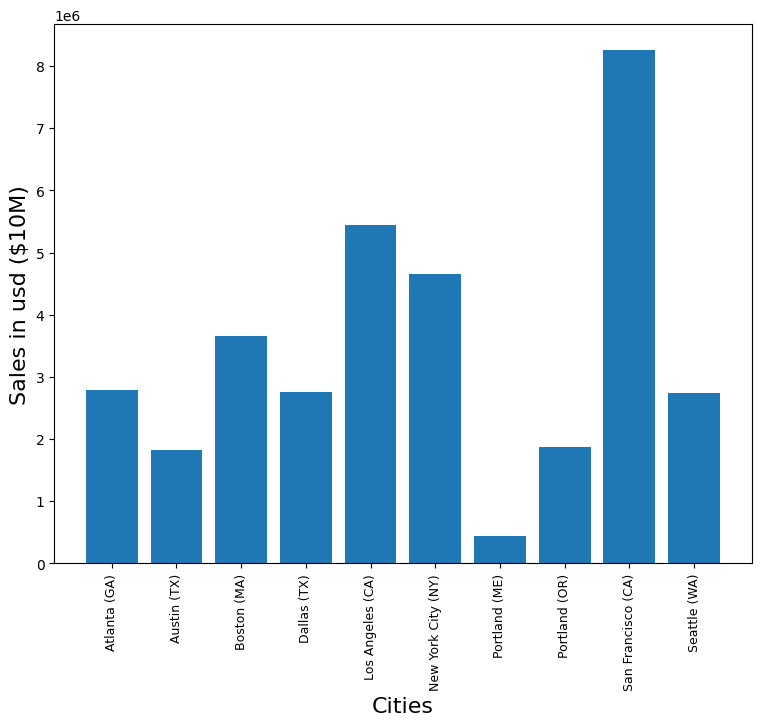

In [29]:
cities= [city for city, df in all_data.groupby('City')]
plt.figure(figsize=(9,7))
plt.bar(cities,q2)
plt.xticks(cities, rotation= 'vertical', size=9)
plt.xlabel('Cities',size=16)
plt.ylabel('Sales in usd ($10M)',size=16)
plt.show()


In [30]:
def a(i):      #This operation is vectorized, meaning pandas applies * 2 to each element in the Series automatically.
    return i*2  
a(all_data['Price Each'])    

0           23.90
1          199.98
2         1200.00
3           23.98
4           23.98
           ...   
185681       5.98
185682    1400.00
185683    1400.00
185684     759.98
185685      23.90
Name: Price Each, Length: 185686, dtype: float64

### Q3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [31]:
 all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


In [32]:
all_data['Hours']=all_data['Order Date'].dt.hour
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8


In [33]:
q3=all_data.groupby('Hours')['Order ID'].count()
q3

Hours
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: Order ID, dtype: int64

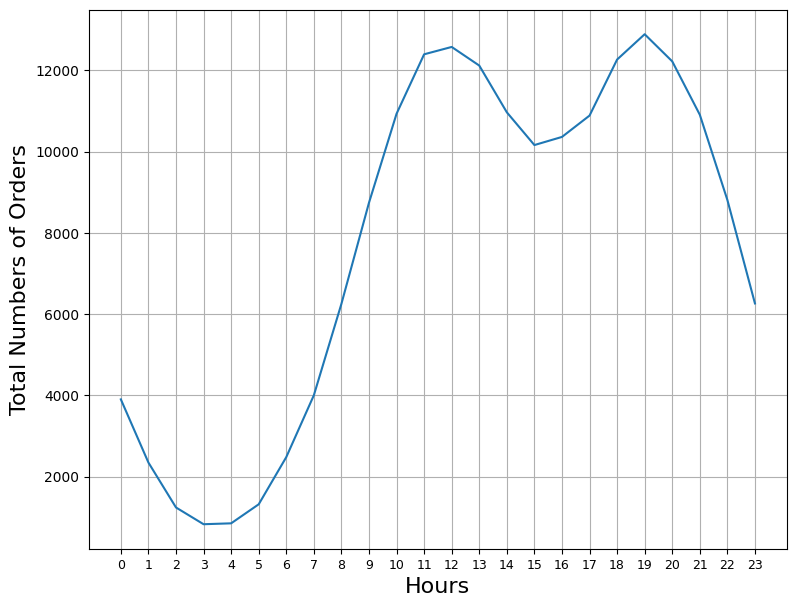

In [34]:
hrs= range(0,24)
plt.figure(figsize=(9,7))
plt.plot(hrs,q3)
plt.xticks(hrs, size=9)
plt.grid()
plt.xlabel('Hours',size=16)
plt.ylabel('Total Numbers of Orders',size=16)
plt.show()

### Q4: What products are most often sold together?

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [36]:
all_data.Product.value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [37]:
df= all_data[all_data.duplicated('Order ID',keep= False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df= df[['Order ID', 'Grouped']].drop_duplicates()
df

C:\Users\hp\AppData\Local\Temp\ipykernel_10352\110927583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
185600,259277,"iPhone,Wired Headphones"
185621,259297,"iPhone,Lightning Charging Cable"
185628,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185640,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [38]:
 df.groupby('Grouped')['Order ID'].count().sort_values(ascending= False).head(5)

Grouped
iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Order ID, dtype: int64

### Q5: What product sold the most? Why do you think it sold the most?

In [39]:
all_data.Product.value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [40]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14


In [56]:
# q5^=all_data.groupby('Product')[['Quantity Ordered']].sum().sort_values(by='Quantity Ordered',ascending=False)
# q5^

,Quantity Ordered
Product,
AAA Batteries (4-pack),30986.0
AA Batteries (4-pack),27615.0
USB-C Charging Cable,23931.0
Lightning Charging Cable,23169.0
Wired Headphones,20524.0
Apple Airpods Headphones,15637.0
Bose SoundSport Headphones,13430.0
27in FHD Monitor,7541.0
iPhone,6847.0


In [57]:
q5=all_data.groupby('Product')['Quantity Ordered'].sum()
q5

Product
20in Monitor                   4126.0
27in 4K Gaming Monitor         6239.0
27in FHD Monitor               7541.0
34in Ultrawide Monitor         6192.0
AA Batteries (4-pack)         27615.0
AAA Batteries (4-pack)        30986.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
Flatscreen TV                  4813.0
Google Phone                   5529.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23169.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
USB-C Charging Cable          23931.0
Vareebadd Phone                2068.0
Wired Headphones              20524.0
iPhone                         6847.0
Name: Quantity Ordered, dtype: float64

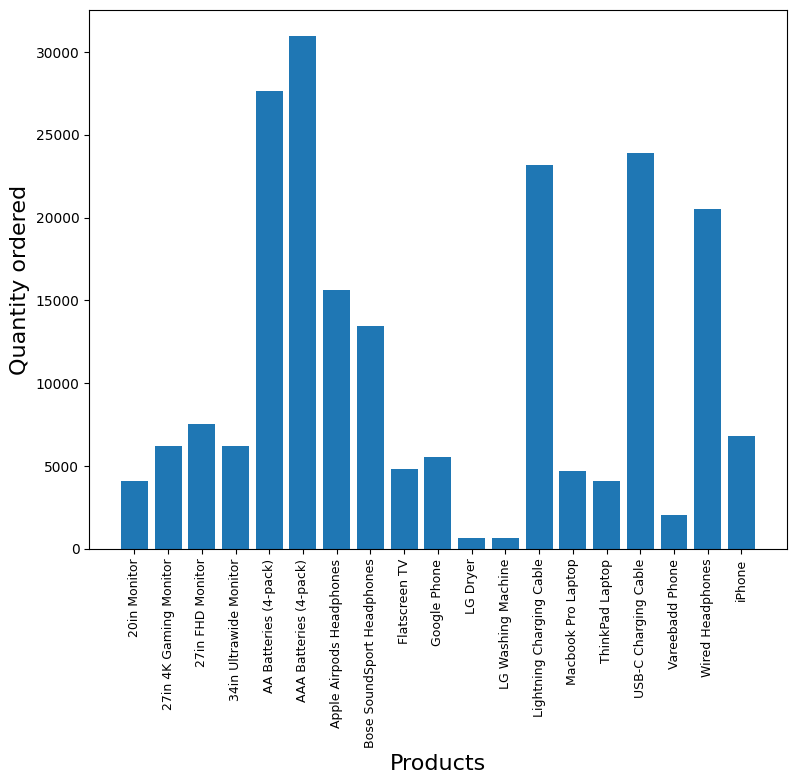

In [55]:
pros= [ pro for pro,df in all_data.groupby('Product')]
plt.figure(figsize=(9,7))
plt.bar(pros,q5)
plt.xticks(pros, rotation= 'vertical', size=9)
plt.xlabel('Products',size=16)
plt.ylabel('Quantity ordered',size=16)
plt.show()

In [46]:
# def lis(x):
#     return list(x)

# lis(all_data['Product'])

In [58]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [90]:
# all_data.query("`Price Each`>700 and Hours>12")
# all_data[(all_data['Price Each']>=1700)&(all_data.Hours>12)]
# all_data[(all_data['Price Each']>=1700) & (all_data['Hours']>12)]
# all_data[all_data['Price Each']>500]